In [3]:
import yfinance as yf
import pandas as pd
import numpy as np
from sklearn.impute import KNNImputer
import matplotlib.pyplot as plt

In [10]:
df = pd.read_csv('/Users/hemantg/Downloads/(ronit)merged_final-to-be-used.csv')

In [11]:
df.head()

,CompanyName,Revenuequarter1,Revenuequarter2,Revenuequarter3,Revenuequarter4,Expensesquarter1,Expensesquarter2,Expensesquarter3,Expensesquarter4,Net Profitquarter1,...,Cash from Financing Activitycash_flows_year9,Net Cash Flowcash_flows_year9,sentiment_score,price_target%,recommendation,Subscription,GMP%,ListingPrice%,ClosingPrice%,Market Cap
0,AADHARHFC,692,673,629,593,166,156,132,166,202,...,NaN,NaN,0.75,97.619048,Subscribe,26.76x,13.650794,100.000000,104.619048,1.356640e+11
1,ABDL,758,768,895,851,683,708,836,780,11,...,NaN,NaN,0.50,0.000000,NaN,24.85x,20.996441,113.879004,113.131673,8.950721e+10
2,ABSLAMC,255.12,278.75,315.32,303.17,129.69,131.99,158.58,148.23,125.43,...,NaN,NaN,0.70,98.806180,Subscribe,5.25x,4.915730,100.421348,98.265449,2.061820e+11
3,ACI,293,400,373,307,175,239,213,190,64,...,NaN,NaN,0.50,0.000000,NaN,32.23x,31.203931,110.565111,112.567568,5.552865e+10
4,ACMESOLAR,260,310,323,369,39,38,34,47,15,...,NaN,NaN,0.65,100.000000,Subscribe,2.89x,1.384083,86.851211,87.716263,1.518770e+11


In [12]:
import yfinance as yf
import pandas as pd

# Function to retrieve outstanding shares
def get_outstanding_shares(ticker):
    try:
        stock = yf.Ticker(ticker + ".NS")
        if 'sharesOutstanding' in stock.info:
            print("Found!")
            return stock.info['sharesOutstanding']
        print(f"'sharesOutstanding' not found for {ticker}")
        return None
    except Exception as e:
        print(f"Error retrieving data for {ticker}: {e}")
        return None

# Apply the function to the 'Ticker' column
df['Outstanding Shares'] = df["NSE Ticker"].apply(get_outstanding_shares)

KeyError: 'NSE Ticker'

In [71]:
df.head()

,Name,NSE Ticker,Listing Date,IPO Size,Subscription,GMP,IPO Price,Listing Price Value,Listing Price %,Closing Price Value,Closing Price %,Outstanding Shares
0,Aadhar Housing Finance,AADHARHFC,15-May-24,3000,26.76x,43.0,315,315.0,0.00%,329.55,4.62%,4.306800e+08
1,Abans Holdings,AHL,23-Dec-22,345,1.10x,3.0,270,273.0,1.11%,218.40,-19.11%,5.055270e+07
2,ACME Solar Holdings,ACMESOLAR,13-Nov-24,2900,2.89x,4.0,289,251.0,-13.15%,253.50,-12.28%,6.050880e+08
3,Adani Wilmar,AWL,8-Feb-22,3600,17.37x,23.0,230,227.0,-1.30%,268.25,16.63%,1.299680e+09
4,Aditya Birla AMC,ABSLAMC,11-Oct-21,2768,5.25x,35.0,712,715.0,0.42%,699.65,-1.73%,2.883660e+08


In [72]:
rows_with_nans = df[df['Outstanding Shares'].isna()]

print("Rows with NaN values in 'Outstanding Shares':")
print(rows_with_nans)

Rows with NaN values in 'Outstanding Shares':
                    Name NSE Ticker Listing Date  IPO Size Subscription   GMP  \
132    NTPC Green Energy  NTPCGREEN    27-Nov-24     10000        2.55x   1.0   
141  Platinum Industries    PLATIND     5-Mar-24       235       98.99x  87.0   
179  Suraksha Clinic and   SURAKSHA     6-Dec-24       846        1.27x  13.0   

     IPO Price  Listing Price Value Listing Price %  Closing Price Value  \
132        108                111.5           3.24%                122.1   
141        171                225.0          31.58%                221.2   
179        441                438.0          -0.68%                441.0   

    Closing Price %  Outstanding Shares  
132          13.06%                 NaN  
141          29.36%                 NaN  
179           0.00%                 NaN  


In [73]:
df = df.dropna(subset=['Outstanding Shares'])

In [74]:
df.head()

,Name,NSE Ticker,Listing Date,IPO Size,Subscription,GMP,IPO Price,Listing Price Value,Listing Price %,Closing Price Value,Closing Price %,Outstanding Shares
0,Aadhar Housing Finance,AADHARHFC,15-May-24,3000,26.76x,43.0,315,315.0,0.00%,329.55,4.62%,4.306800e+08
1,Abans Holdings,AHL,23-Dec-22,345,1.10x,3.0,270,273.0,1.11%,218.40,-19.11%,5.055270e+07
2,ACME Solar Holdings,ACMESOLAR,13-Nov-24,2900,2.89x,4.0,289,251.0,-13.15%,253.50,-12.28%,6.050880e+08
3,Adani Wilmar,AWL,8-Feb-22,3600,17.37x,23.0,230,227.0,-1.30%,268.25,16.63%,1.299680e+09
4,Aditya Birla AMC,ABSLAMC,11-Oct-21,2768,5.25x,35.0,712,715.0,0.42%,699.65,-1.73%,2.883660e+08


In [75]:
tickers_to_drop = ["GOPAL", "BAJAJHFL", "FEDFINA", "DIVJIITTS", "MUTHOOTMF", "NETWEB", "PYRAMID", " VSTL"]
df = df[~df['NSE Ticker'].isin(tickers_to_drop)]

In [76]:
df

,Name,NSE Ticker,Listing Date,IPO Size,Subscription,GMP,IPO Price,Listing Price Value,Listing Price %,Closing Price Value,Closing Price %,Outstanding Shares
0,Aadhar Housing Finance,AADHARHFC,15-May-24,3000,26.76x,43.0,315,315.0,0.00%,329.55,4.62%,4.306800e+08
1,Abans Holdings,AHL,23-Dec-22,345,1.10x,3.0,270,273.0,1.11%,218.40,-19.11%,5.055270e+07
2,ACME Solar Holdings,ACMESOLAR,13-Nov-24,2900,2.89x,4.0,289,251.0,-13.15%,253.50,-12.28%,6.050880e+08
3,Adani Wilmar,AWL,8-Feb-22,3600,17.37x,23.0,230,227.0,-1.30%,268.25,16.63%,1.299680e+09
4,Aditya Birla AMC,ABSLAMC,11-Oct-21,2768,5.25x,35.0,712,715.0,0.42%,699.65,-1.73%,2.883660e+08
...,...,...,...,...,...,...,...,...,...,...,...,...
201,Windlas Biotech,WINDLAS,16-Aug-21,401,22.44x,80.0,460,437.0,-5.00%,407.15,-11.49%,2.090030e+07
202,Yatharth Hospital,YATHARTH,7-Aug-23,686,37.28x,75.0,300,306.1,2.03%,300.00,0.00%,8.585020e+07
203,Yatra Online,YATRA,28-Sep-23,775,1.66x,0.0,142,127.5,-10.21%,135.95,-4.26%,1.569160e+08
204,Zaggle Prepaid Ocean,ZAGGLE,22-Sep-23,563,12.86x,11.0,164,164.0,0.00%,158.35,-3.45%,1.228360e+08


In [77]:
csv_file_path = 'cleaned_data.csv'
df.to_csv(csv_file_path, index=False)

In [49]:
data = pd.read_csv('/Users/hemantg/Downloads/(ronit)merged_final-to-be-used.csv')

In [50]:
data.head()

,CompanyName,Revenuequarter1,Revenuequarter2,Revenuequarter3,Revenuequarter4,Expensesquarter1,Expensesquarter2,Expensesquarter3,Expensesquarter4,Net Profitquarter1,...,sentiment_score,price_target%,recommendation,IPO Size,Subscription,GMP%,ListingPrice%,ClosingPrice%,Outstanding Shares,Market Cap
0,AADHARHFC,692,673,629,593,166,156,132,166,202,...,0.75,97.619048,Subscribe,3000,26.76x,13.650794,100.000000,104.619048,430680000,1.356640e+11
1,ABDL,758,768,895,851,683,708,836,780,11,...,0.50,0.000000,NaN,1500,24.85x,20.996441,113.879004,113.131673,279710016,8.950721e+10
2,ABSLAMC,255.12,278.75,315.32,303.17,129.69,131.99,158.58,148.23,125.43,...,0.70,98.806180,Subscribe,2768,5.25x,4.915730,100.421348,98.265449,288366016,2.061820e+11
3,ACI,293,400,373,307,175,239,213,190,64,...,0.50,0.000000,NaN,1462,32.23x,31.203931,110.565111,112.567568,123397000,5.552865e+10
4,ACMESOLAR,260,310,323,369,39,38,34,47,15,...,0.65,100.000000,Subscribe,2900,2.89x,1.384083,86.851211,87.716263,605088000,1.518770e+11


In [51]:
numerical_cols = data.select_dtypes(include=[np.number]).columns

In [52]:
numerical_cols

Index(['Equity Capitalbalance_sheet_year4',
       'Equity Capitalbalance_sheet_year5', 'Net Profitquarter5',
       'Equity Capitalbalance_sheet_year6', 'Net Cash Flowcash_flows_year6',
       'Net Profitquarter6', 'EPS in Rsquarter6',
       'Cash from Operating Activitycash_flows_year7',
       'Cash from Operating Activitycash_flows_year8',
       'Cash from Investing Activitycash_flows_year8',
       'Cash from Financing Activitycash_flows_year7',
       'Cash from Financing Activitycash_flows_year8',
       'Net Cash Flowcash_flows_year7', 'Net Cash Flowcash_flows_year8',
       'Equity Capitalbalance_sheet_year7',
       'Equity Capitalbalance_sheet_year8', 'Reservesbalance_sheet_year8',
       'Borrowingsbalance_sheet_year8', 'Fixed Assetsbalance_sheet_year8',
       'Revenuequarter7', 'Expensesquarter7', 'Net Profitquarter7',
       'EPS in Rsquarter7', 'Equity Capitalbalance_sheet_year9',
       'Reservesbalance_sheet_year9', 'Borrowingsbalance_sheet_year9',
       'Total Lia

In [53]:
def check_missing_values(dataframe):
    missing_values = dataframe.isnull().sum()
    missing_summary = pd.DataFrame({
        'Column': missing_values.index,
        'Missing_Count': missing_values.values,
        'Percentage_Missing': (missing_values.values / len(dataframe)) * 100
    })
    return missing_summary.sort_values(by='Percentage_Missing', ascending=False)

# Check missing values
missing_summary = check_missing_values(data)
missing_summary

,Column,Missing_Count,Percentage_Missing
92,Net Cash Flowcash_flows_year8,193,99.484536
111,Borrowingsbalance_sheet_year9,193,99.484536
88,Cash from Investing Activitycash_flows_year8,193,99.484536
86,Cash from Operating Activitycash_flows_year8,193,99.484536
105,Revenuequarter7,193,99.484536
...,...,...,...
120,price_target%,0,0.000000
119,sentiment_score,0,0.000000
9,Net Profitquarter1,0,0.000000
5,Expensesquarter1,0,0.000000


In [54]:
# Function to drop columns with more than a specified percentage of missing values
def drop_high_missing_cols(dataframe, threshold=50):
    missing_values = dataframe.isnull().sum() / len(dataframe) * 100
    cols_to_drop = missing_values[missing_values > threshold].index
    dataframe_cleaned = dataframe.drop(columns=cols_to_drop)
    return dataframe_cleaned, cols_to_drop

# Drop columns with more than 50% missing values
data, dropped_columns = drop_high_missing_cols(data, threshold=50)

# Display dropped columns
print("Dropped Columns:")
print(dropped_columns)

Dropped Columns:
Index(['Cash from Operating Activitycash_flows_year5',
       'Cash from Investing Activitycash_flows_year5',
       'Cash from Financing Activitycash_flows_year5',
       'Net Cash Flowcash_flows_year5', 'Equity Capitalbalance_sheet_year5',
       'Reservesbalance_sheet_year5', 'Borrowingsbalance_sheet_year5',
       'Total Liabilitiesbalance_sheet_year5',
       'Fixed Assetsbalance_sheet_year5', 'Total Assetsbalance_sheet_year5',
       'Equity Capitalbalance_sheet_year6', 'Reservesbalance_sheet_year6',
       'Borrowingsbalance_sheet_year6', 'Total Liabilitiesbalance_sheet_year6',
       'Fixed Assetsbalance_sheet_year6', 'Total Assetsbalance_sheet_year6',
       'Cash from Operating Activitycash_flows_year6',
       'Cash from Investing Activitycash_flows_year6',
       'Cash from Financing Activitycash_flows_year6',
       'Net Cash Flowcash_flows_year6', 'Revenuequarter6', 'Expensesquarter6',
       'Net Profitquarter6', 'EPS in Rsquarter6',
       'Cash from Op

In [55]:
data["recommendation"] = data["recommendation"].map({'Subscribe': 1, 'Do Not Subscribe': 0})

In [56]:
missing_summary = check_missing_values(data)
missing_summary

,Column,Missing_Count,Percentage_Missing
60,EPS in Rsquarter5,96,49.484536
57,Revenuequarter5,92,47.422680
59,Net Profitquarter5,91,46.907216
58,Expensesquarter5,91,46.907216
63,recommendation,71,36.597938
...,...,...,...
62,price_target%,0,0.000000
61,sentiment_score,0,0.000000
9,Net Profitquarter1,0,0.000000
5,Expensesquarter1,0,0.000000


In [57]:
# Convert all columns to numeric, removing commas
data = data.drop(columns="CompanyName")
if 'Subscription' in data.columns:
    data['Subscription'] = data['Subscription'].str.replace('x', '', regex=False).astype(float)
data = data.replace(',', '', regex=True).apply(pd.to_numeric, errors='coerce')

In [58]:
print(len(data.columns))

70


In [59]:
from sklearn.impute import KNNImputer
import numpy as np
import pandas as pd

# Rebuild numerical columns to exclude any dropped columns
numerical_cols = data.select_dtypes(include=[np.number]).columns

# Recheck columns with all NaNs and drop them if found
all_nan_cols = data[numerical_cols].columns[data[numerical_cols].isna().all()]

# Drop these columns to avoid shape mismatches
data.drop(columns=all_nan_cols, inplace=True)
numerical_cols = data.select_dtypes(include=[np.number]).columns

# Initialize KNN imputer
knn_imputer = KNNImputer(n_neighbors=5)

# Perform KNN imputation
imputed_array = knn_imputer.fit_transform(data[numerical_cols])

# Assign imputed values back to DataFrame
data_imputed = data.copy()
data_imputed[numerical_cols] = imputed_array

# Check for remaining missing values
missing_after_imputation = data_imputed.isnull().sum()

# Display results
print("Dropped columns with all NaNs:", all_nan_cols.tolist())
print("Missing values after KNN imputation:")
print(missing_after_imputation[missing_after_imputation > 0])

Dropped columns with all NaNs: []
Missing values after KNN imputation:
Series([], dtype: int64)


In [60]:
csv_file_path = 'data_imputes.csv'
data_imputed.to_csv(csv_file_path, index=False)

In [61]:
csv_file_path = 'data.csv'
data.to_csv(csv_file_path, index=False)

In [62]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

X = data_imputed.drop('Market Cap', axis=1, errors='ignore')
y = data_imputed['Market Cap']

# Encode categorical features if needed
X_encoded = pd.get_dummies(X, drop_first=True)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Train Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

mse, r2

(4.2057552594129356e+21, 0.7471824602260841)

In [71]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_squared_log_error, max_error
import numpy as np

# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

# Calculate Adjusted R²
n = 194  # Number of samples
p = 71 #Number of features
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

# Calculate RMSLE (Root Mean Squared Log Error)
try:
    rmsle = np.sqrt(mean_squared_log_error(y_test, y_pred))
except ValueError:
    rmsle = np.nan  # Handle negative values gracefully

# Calculate MAPE (Mean Absolute Percentage Error)
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape = mean_absolute_percentage_error(y_test, y_pred)

# Calculate Mean Log Error
mean_log_error = np.mean(np.log1p(np.abs(y_test - y_pred)))

# Calculate Max Log Error
try:
    max_log_error = max_error(np.log1p(y_test), np.log1p(y_pred))
except ValueError:
    max_log_error = np.nan  # Handle negative values gracefully

# Print results
print(f"MSE: {mse:.2f}")
print(f"R²: {r2:.2f}")
print(f"Adjusted R²: {adjusted_r2:.2f}")
print(f"MAE: {mae:.2f}")
print(f"RMSLE: {rmsle:.2f}")
print(f"MAPE: {mape:.2f}%")
print(f"Mean Log Error: {mean_log_error:.2f}")
print(f"Max Log Error: {max_log_error:.2f}")


MSE: 4205755259412935606272.00
R²: 0.75
Adjusted R²: 0.60
MAE: 37436150404.31
RMSLE: 0.61
MAPE: 72.93%
Mean Log Error: 23.51
Max Log Error: 1.59


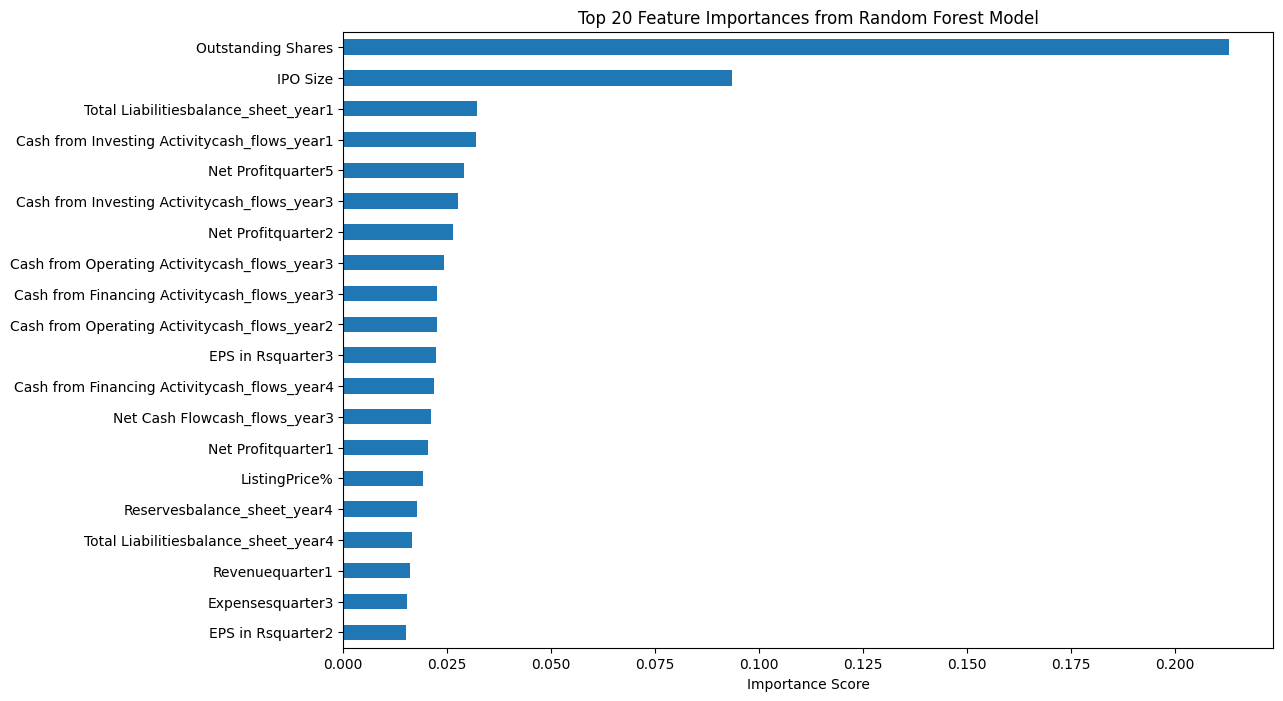

In [63]:
# Check if the model has been trained
if 'rf_model' in locals() and 'X_encoded' in locals():
    # Get feature importances
    feature_importances = pd.Series(rf_model.feature_importances_, index=X_encoded.columns)

    # Sort and plot the top features
    feature_importances_sorted = feature_importances.sort_values(ascending=False).head(20)

    plt.figure(figsize=(12, 8))
    feature_importances_sorted.plot(kind='barh')
    plt.title("Top 20 Feature Importances from Random Forest Model")
    plt.xlabel("Importance Score")
    plt.gca().invert_yaxis()  # Highest importance at the top
    plt.show()
else:
    print("Model not trained. Please train the Random Forest model first.")

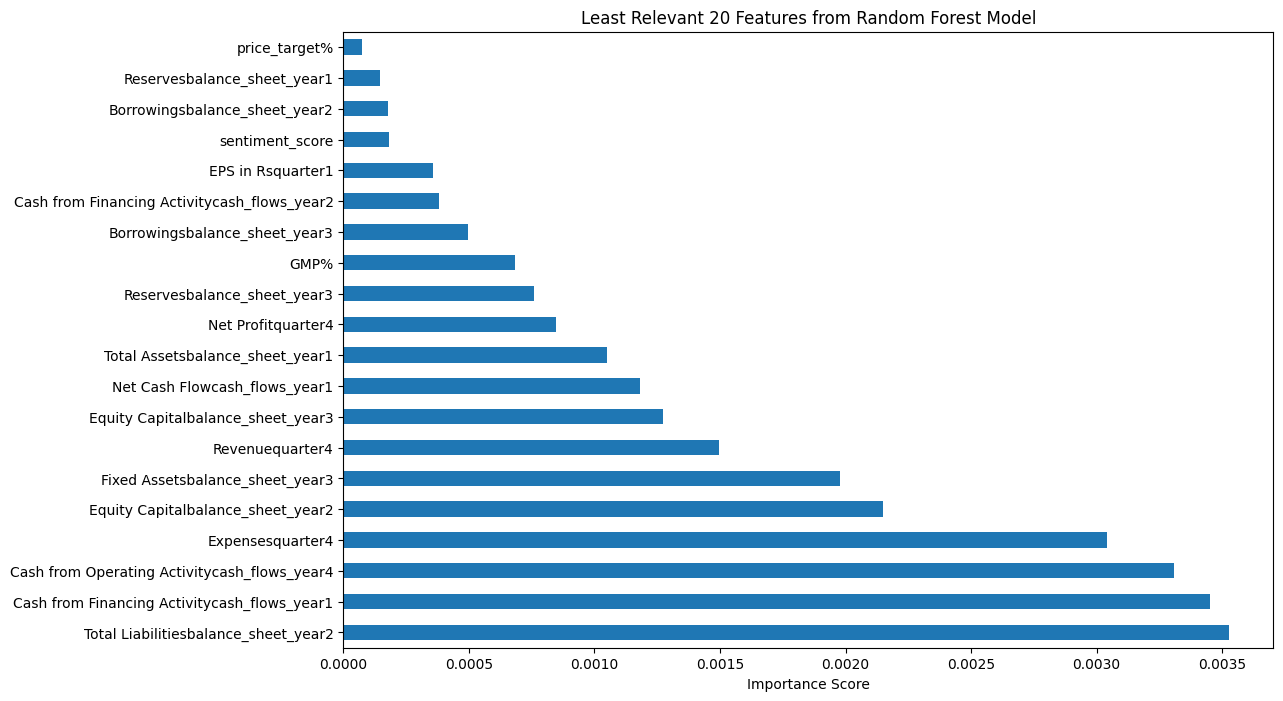

Least Relevant Features:
price_target%                                   0.000076
Reservesbalance_sheet_year1                     0.000147
Borrowingsbalance_sheet_year2                   0.000180
sentiment_score                                 0.000184
EPS in Rsquarter1                               0.000357
Cash from Financing Activitycash_flows_year2    0.000382
Borrowingsbalance_sheet_year3                   0.000499
GMP%                                            0.000686
Reservesbalance_sheet_year3                     0.000759
Net Profitquarter4                              0.000847
Total Assetsbalance_sheet_year1                 0.001050
Net Cash Flowcash_flows_year1                   0.001181
Equity Capitalbalance_sheet_year3               0.001273
Revenuequarter4                                 0.001497
Fixed Assetsbalance_sheet_year3                 0.001980
Equity Capitalbalance_sheet_year2               0.002148
Expensesquarter4                                0.003041
Cash f

In [72]:
# Check if the model has been trained
if 'rf_model' in locals() and 'X_encoded' in locals():
    # Get feature importances
    feature_importances = pd.Series(rf_model.feature_importances_, index=X_encoded.columns)

    # Sort and plot the least relevant features (bottom 20)
    feature_importances_sorted_least = feature_importances.sort_values(ascending=True).head(20)

    plt.figure(figsize=(12, 8))
    feature_importances_sorted_least.plot(kind='barh')
    plt.title("Least Relevant 20 Features from Random Forest Model")
    plt.xlabel("Importance Score")
    plt.gca().invert_yaxis()  # Lowest importance at the top
    plt.show()

    # Display the least relevant features in the console
    print("Least Relevant Features:")
    print(feature_importances_sorted_least)
else:
    print("Model not trained. Please train the Random Forest model first.")


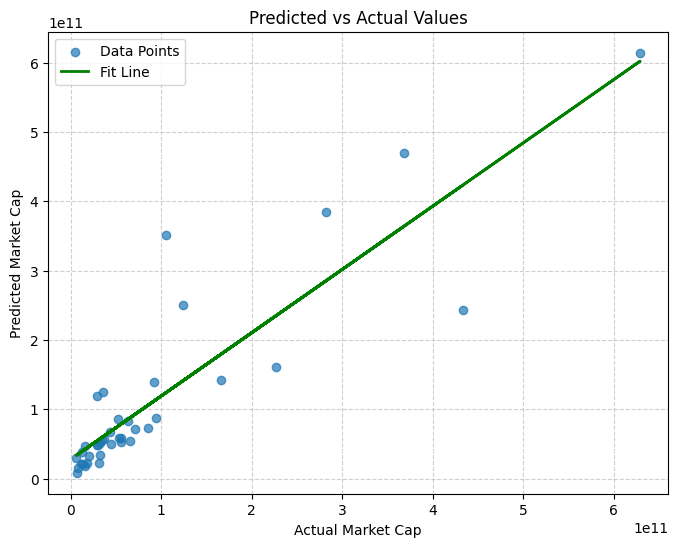

In [64]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

# Reshape data for linear regression
y_test_reshaped = np.array(y_test).reshape(-1, 1)
y_pred_reshaped = np.array(y_pred).reshape(-1, 1)

# Fit a linear regression model
reg_model = LinearRegression().fit(y_test_reshaped, y_pred_reshaped)
line_pred = reg_model.predict(y_test_reshaped)

# Plot Predicted vs Actual with Fit Line
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7, label="Data Points")
plt.plot(y_test, line_pred, color='green', linewidth=2, label="Fit Line")
plt.title("Predicted vs Actual Values")
plt.xlabel("Actual Market Cap")
plt.ylabel("Predicted Market Cap")
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.show()


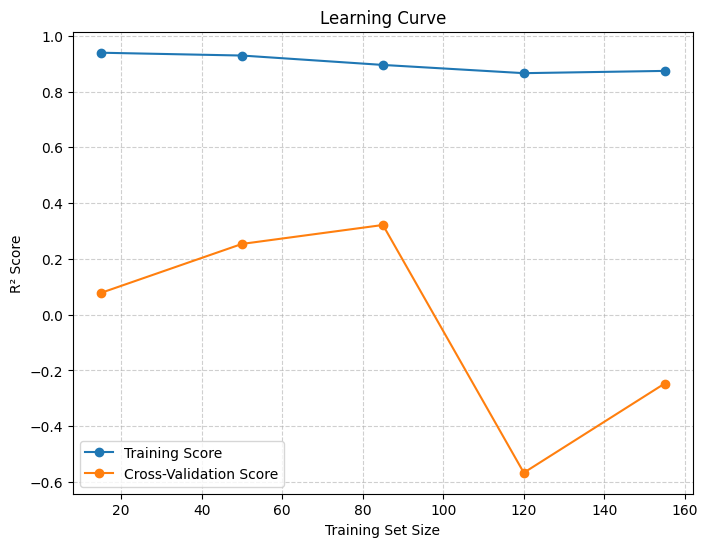

In [65]:
from sklearn.model_selection import learning_curve
import numpy as np

# Learning Curve
train_sizes, train_scores, test_scores = learning_curve(
    rf_model, X_encoded, y, cv=5, scoring='r2', n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 5)
)

train_mean = train_scores.mean(axis=1)
test_mean = test_scores.mean(axis=1)

plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_mean, label="Training Score", marker='o')
plt.plot(train_sizes, test_mean, label="Cross-Validation Score", marker='o')
plt.title("Learning Curve")
plt.xlabel("Training Set Size")
plt.ylabel("R² Score")
plt.legend(loc="best")
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()
#%%


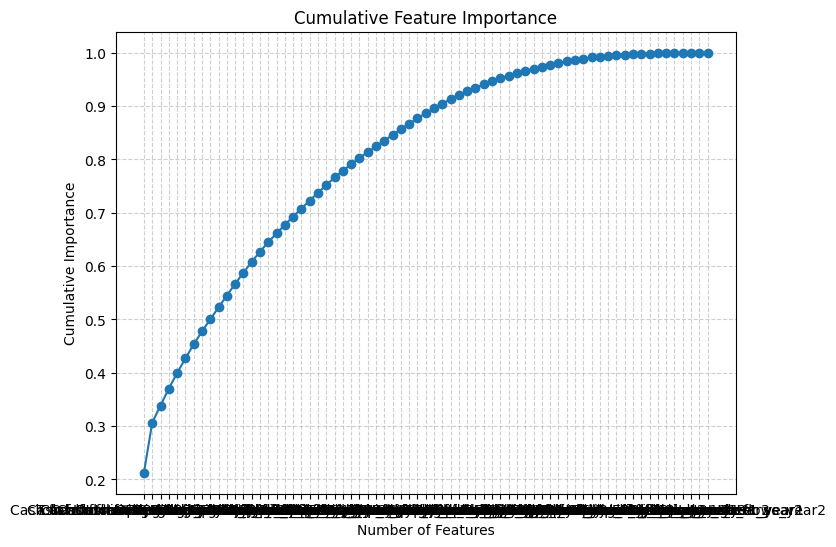

In [66]:
import numpy as np
# Cumulative Feature Importance
sorted_importances = feature_importances.sort_values(ascending=False)
cumulative_importances = np.cumsum(sorted_importances)

plt.figure(figsize=(8, 6))
plt.plot(cumulative_importances, marker='o')
plt.title("Cumulative Feature Importance")
plt.xlabel("Number of Features")
plt.ylabel("Cumulative Importance")
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()
#%%



In [ ]:
from sklearn.preprocessing import StandardScaler
from xgboost import XGBRegressor
X_encoded = pd.get_dummies(X, drop_first=True)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Standardize Data (if needed)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train XGBoost Model
xgb_model = XGBRegressor(
    n_estimators=200,
    learning_rate=0.1,
    max_depth=5,
    random_state=42
)
xgb_model.fit(X_train_scaled, y_train)

# Make Predictions
y_pred_xgb = xgb_model.predict(X_test_scaled)

# Evaluate Model
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print(f"Mean Squared Error (MSE): {mse_xgb:.4f}")
print(f"R² Score: {r2_xgb:.4f}")